In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
print(torch.__version__)


2.4.0


In [3]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split




train_folder = '/Users/shriya/Desktop/Sih 3.zip'
batch_size =32

transform = transforms.Compose([
  transforms.Grayscale(),
  transforms.Resize((64, 64)),
  transforms.ToTensor()
    ])

dataset = ImageFolder(train_folder, transform=transform)
num_classes = len(dataset.classes)

train_indices, test_indices = train_test_split(list(range(len(dataset))), test_size=0.2)

train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
test_sampler = torch.utils.data.SubsetRandomSampler(test_indices)

train_loader = DataLoader(dataset,batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler)
print(num_classes)

8


In [4]:
classes = {1: 'क',2:'ख', 3:'ग',4:'घ',5:'च',6:'छ',7:'ज',8:'झ'}

<bound method Tensor.unique of tensor([5, 7, 4, 4, 6, 7, 5, 5, 3, 3, 1, 4, 5, 1, 5, 2, 0, 7, 2, 5, 1, 5, 1, 4,
        5, 4, 3, 3, 1, 2, 4, 2])>


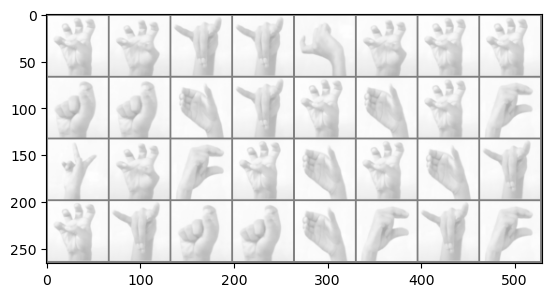

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(labels.unique)

# show images
imshow(torchvision.utils.make_grid(images))

In [6]:
onehot=torch.nn.functional.one_hot(labels, 35)
onehot[0,:]

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten(1,-1)
        self.fc1 = nn.Linear(64*6*6, 128)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 35)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [8]:
net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [10]:
from tqdm import tqdm

In [11]:
epochs=10
train_loss=[]
train_acc=[]
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct=0
    total=0
    for i, data in tqdm(enumerate(train_loader, 0)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    running_loss /= len(train_loader.dataset)
    epoch_acc = correct / total

    train_loss.append(running_loss)
    train_acc.append(epoch_acc)

    # Print the epoch, loss, and accuracy
    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {running_loss:.4f}, Train Acc: {epoch_acc:.4f}")
    

print('Finished Training')

0it [00:00, ?it/s]

21it [00:07,  2.91it/s]


Epoch: 1/10, Train Loss: 0.0908, Train Acc: 0.1097


21it [00:06,  3.08it/s]


Epoch: 2/10, Train Loss: 0.0899, Train Acc: 0.1546


21it [00:06,  3.05it/s]


Epoch: 3/10, Train Loss: 0.0880, Train Acc: 0.2519


21it [00:06,  3.05it/s]


Epoch: 4/10, Train Loss: 0.0744, Train Acc: 0.7759


21it [00:06,  3.04it/s]


Epoch: 5/10, Train Loss: 0.0679, Train Acc: 0.9923


21it [00:06,  3.04it/s]


Epoch: 6/10, Train Loss: 0.0676, Train Acc: 1.0000


21it [00:06,  3.03it/s]


Epoch: 7/10, Train Loss: 0.0676, Train Acc: 1.0000


21it [00:06,  3.10it/s]


Epoch: 8/10, Train Loss: 0.0676, Train Acc: 1.0000


21it [00:06,  3.06it/s]


Epoch: 9/10, Train Loss: 0.0676, Train Acc: 1.0000


21it [00:06,  3.08it/s]

Epoch: 10/10, Train Loss: 0.0676, Train Acc: 1.0000
Finished Training


In [12]:
m = Net()
m.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 0.2014,  0.0055,  0.0203],
                        [-0.2979, -0.2772,  0.1243],
                        [-0.0344, -0.1094, -0.0557]]],
              
              
                      [[[ 0.0799, -0.0825,  0.1455],
                        [-0.2463,  0.1595,  0.0920],
                        [ 0.2772,  0.1703, -0.2726]]],
              
              
                      [[[ 0.0726,  0.2276, -0.1696],
                        [ 0.1080, -0.1424,  0.2668],
                        [-0.0188,  0.0820,  0.2104]]],
              
              
                      [[[-0.1231,  0.0688, -0.1534],
                        [-0.1656, -0.1380, -0.1814],
                        [-0.3089,  0.2364, -0.1606]]],
              
              
                      [[[ 0.0092, -0.2273, -0.0250],
                        [-0.0600,  0.0290,  0.1742],
                        [ 0.0840, -0.0268, -0.3181]]],
              
              
               

In [13]:
torch.save(m.state_dict(), 'net.pt')
m_state_dict = torch.load('net.pt')
new_m = Net()
new_m.load_state_dict(m_state_dict)

/var/folders/_7/9cgzc3b92tn02fyyg2w9jqnh0000gn/T/ipykernel_1908/616424568.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m_state_dict = torch.load('net.pt')


<All keys matched successfully>

In [14]:
class_labels = list(classes.values())

In [15]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100* correct//total}%')


Accuracy of the network on the test images: 100%


In [16]:
torch.save(net.state_dict(), 'model_weights.pth')


In [17]:
saved_state_dict = torch.load('model_weights.pth')
print("Keys in saved state_dict:")
print(saved_state_dict.keys())


Keys in saved state_dict:
odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


/var/folders/_7/9cgzc3b92tn02fyyg2w9jqnh0000gn/T/ipykernel_1908/1235858004.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_state_dict = torch.load('model_weights.p

In [18]:
model = Net()
print("Keys in model state_dict:")
print(model.state_dict().keys())

Keys in model state_dict:
odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


In [19]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)  # Ensure the number of output channels matches
        self.fc1 = nn.Linear(128 * 6 * 6, 128)  # Adjust based on the output size of the last conv layer
        self.fc2 = nn.Linear(128, 35)  # Adjust the number of output classes

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(self.conv3(x))
        x = nn.MaxPool2d(2)(x)
        x = x.view(-1, 128 * 6 * 6)  # Flatten the tensor
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x


In [20]:
# Instantiate and train the updated model
model = Net()
# [Training code here]
torch.save(model.state_dict(), 'model_weights.pth')


In [21]:
model = Net()  # Use the exact architecture
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()


/var/folders/_7/9cgzc3b92tn02fyyg2w9jqnh0000gn/T/ipykernel_1908/30066350.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_weights.

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)